
**Diplomatura en Ciencia de Datos, Aprendizaje Automático y sus Aplicaciones**

**Introducción al aprendizaje automático**

*Edición 2022*

---

### *Grupo N°:* 18

### *Integrantes:*
#### Parada Larrosa, Francisco
#### Peralta, Agustín
####  Porcel, Carolina
####  Quiros, Agustina


## Trabajo práctico entregable - Parte 1 - Regresión en Boston

---

En este laboratorio deben hacer experimentos de regresión con el conjunto de datos "Boston house prices dataset".

Estudiarán el dataset, harán visualizaciones y seleccionarán atributos relevantes a mano.

Luego, entrenarán y evaluarán diferentes tipos de regresiones, buscando las configuraciones que mejores resultados den.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Carga del Conjunto de Datos

Cargamos el conjunto de datos y vemos su contenido.

In [ ]:
from sklearn.datasets import load_boston
boston = load_boston()
boston.keys()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i.e.

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename', 'data_module'])

In [ ]:
# print(boston['DESCR'])   # descripción del dataset
# boston['data']           # matriz con los datos de entrada (atributos)
# boston['target']         # vector de valores a predecir
boston['feature_names']  # nombres de los atributos para cada columna de 'data'

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [ ]:
boston['data'].shape, boston['target'].shape

((506, 13), (506,))

## División en Entrenamiento y Evaluación

Dividimos aleatoriamente los datos en 80% para entrenamiento y 20% para evaluación:

In [ ]:
from sklearn.model_selection import train_test_split
X, y = boston['data'], boston['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=0)
X_train.shape, X_test.shape

((404, 13), (102, 13))

## Ejercicio 1: Descripción de los Datos y la Tarea

Responda las siguientes preguntas:

1. ¿De qué se trata el conjunto de datos?
2. ¿Cuál es la variable objetivo que hay que predecir? ¿Qué significado tiene?
3. ¿Qué información (atributos) hay disponibles para hacer la predicción?
4. ¿Qué atributos imagina ud. que serán los más determinantes para la predicción?
5. ¿Qué problemas observa a priori en el conjunto de datos? ¿Observa posibles sesgos, riesgos, dilemas éticos, etc? Piense que los datos pueden ser utilizados para hacer predicciones futuras.

**No hace falta escribir código para responder estas preguntas.**

In [ ]:
df = pd.DataFrame(boston['data'],columns=boston['feature_names'])

In [ ]:
boston['DESCR']

".. _boston_dataset:\n\nBoston house prices dataset\n---------------------------\n\n**Data Set Characteristics:**  \n\n    :Number of Instances: 506 \n\n    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.\n\n    :Attribute Information (in order):\n        - CRIM     per capita crime rate by town\n        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.\n        - INDUS    proportion of non-retail business acres per town\n        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)\n        - NOX      nitric oxides concentration (parts per 10 million)\n        - RM       average number of rooms per dwelling\n        - AGE      proportion of owner-occupied units built prior to 1940\n        - DIS      weighted distances to five Boston employment centres\n        - RAD      index of accessibility to radial highways\n        - TAX      full-value property-tax rate per $10,000

In [ ]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000


## Ejercicio 2: Visualización de los Datos

1. Para cada atributo de entrada, haga una gráfica que muestre su relación con la variable objetivo.
2. Estudie las gráficas, identificando **a ojo** los atributos que a su criterio sean los más informativos para la predicción.
3. Para ud., ¿cuáles son esos atributos? Lístelos en orden de importancia.

**1. Grafico de cada atributo de entrada con la variable objetivo**

In [ ]:
selector = (boston['feature_names'] == 'ZN')
selector

array([False,  True, False, False, False, False, False, False, False,
       False, False, False, False])

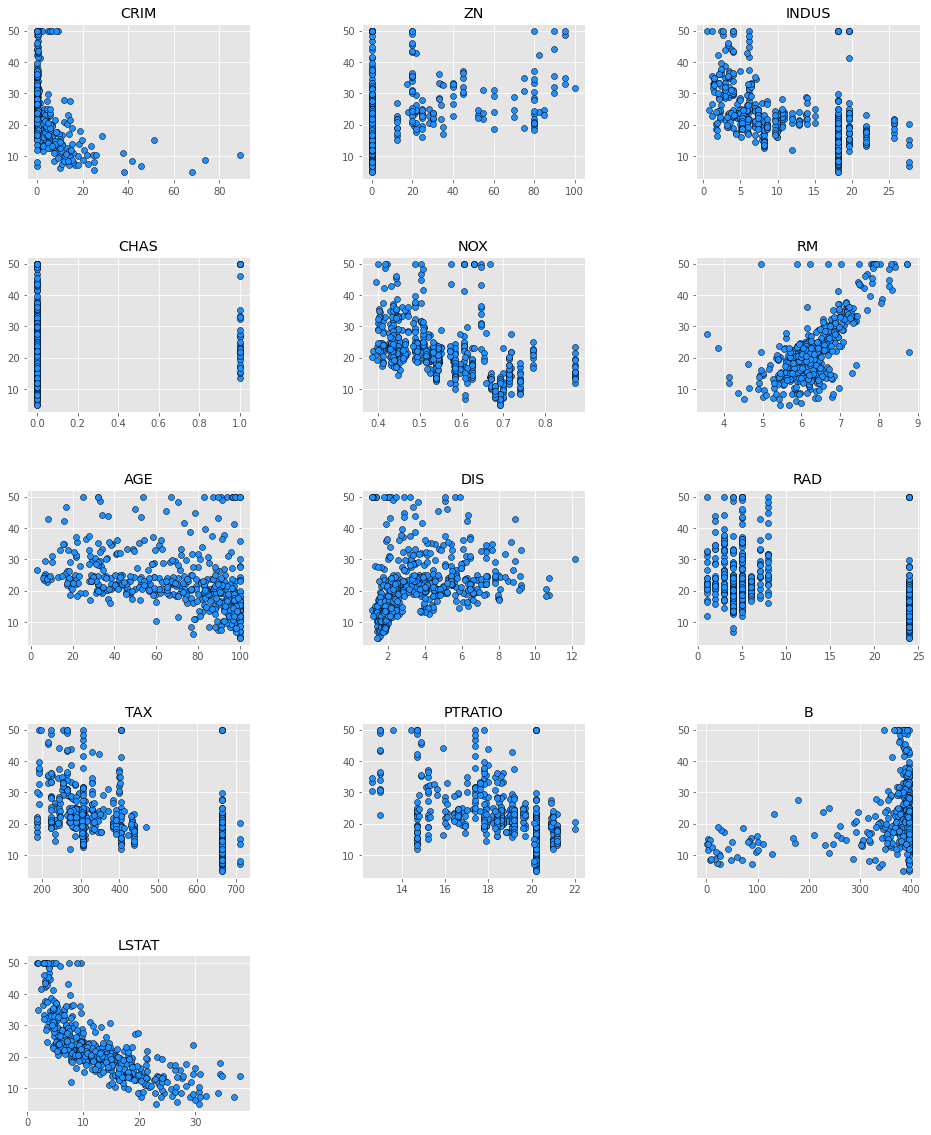

In [ ]:
# 1. Resolver acá. Ayuda/ejemplo:
plt.style.use("ggplot")
plt.figure(figsize=(16,20))
i=0
for col in boston['feature_names']:
  plt.subplots_adjust(hspace=.5,wspace=.5)
  ax=plt.subplot(5,3,i+1)
  feature = col
  selector = (boston['feature_names'] == feature)
  plt.scatter(X[:, selector], y, facecolor="dodgerblue", edgecolor="k", label="datos")
  plt.title(feature)
  i+=1
plt.show()

**2. y 3. Atributos que, a la vista, parecen ser los más indicativos.**

En orden de importancia:

1-RM: Promedio de habitaciones por vivienda.

2-LSTAT: Proporción de gente de bajos recursos por población.

3-AGE: Proporción de unidades ocupadas por sus propietarios construidas antes de 1940

4-DIS: Distancia hasta los centros principales de empleo de Boston

In [ ]:
# Calculamos la correlación para cada atributo con la variable objeto
for col in boston['feature_names']:
  selector = (boston['feature_names'] == col)
  print('Correlacion para la variable',col)
  my_rho = np.corrcoef(X[:,selector].reshape(-1,), y)
  print(my_rho)

Correlacion para la variable CRIM
[[ 1.         -0.38830461]
 [-0.38830461  1.        ]]
Correlacion para la variable ZN
[[1.         0.36044534]
 [0.36044534 1.        ]]
Correlacion para la variable INDUS
[[ 1.         -0.48372516]
 [-0.48372516  1.        ]]
Correlacion para la variable CHAS
[[1.         0.17526018]
 [0.17526018 1.        ]]
Correlacion para la variable NOX
[[ 1.         -0.42732077]
 [-0.42732077  1.        ]]
Correlacion para la variable RM
[[1.         0.69535995]
 [0.69535995 1.        ]]
Correlacion para la variable AGE
[[ 1.         -0.37695457]
 [-0.37695457  1.        ]]
Correlacion para la variable DIS
[[1.         0.24992873]
 [0.24992873 1.        ]]
Correlacion para la variable RAD
[[ 1.         -0.38162623]
 [-0.38162623  1.        ]]
Correlacion para la variable TAX
[[ 1.         -0.46853593]
 [-0.46853593  1.        ]]
Correlacion para la variable PTRATIO
[[ 1.         -0.50778669]
 [-0.50778669  1.        ]]
Correlacion para la variable B
[[1.       

Para corroborar lo analizado en el gráfico, vemos que el atributo que más correlación tiene con la variable objeto es LSTAT y en segundo lugar RM.

## Ejercicio 3: Regresión Lineal

1. Seleccione **un solo atributo** que considere puede ser el más apropiado.
2. Instancie una regresión lineal de **scikit-learn**, y entrénela usando sólo el atributo seleccionado.
3. Evalúe, calculando error cuadrático medio para los conjuntos de entrenamiento y evaluación.
4. Grafique el modelo resultante, junto con los puntos de entrenamiento y evaluación.
5. Interprete el resultado, haciendo algún comentario sobre las cualidades del modelo obtenido.

**Observación:** Con algunos atributos se puede obtener un error en test menor a 50.

**1. Selección del tributo más apropiado**

En base a lo analizado anteriormente elegimos el atributo LSTAT: Proporción de gente de bajos recursos por población.

**2. Regresión lineal**

In [ ]:
# 1. Resolver acá. Ayuda:
feature = 'LSTAT'  # selecciono el atributo 'CRIM'
selector = (boston['feature_names'] == feature)
X_train_f = X_train[:, selector]
X_test_f = X_test[:, selector]
X_train_f.shape, X_test_f.shape


((404, 1), (102, 1))

**Escalamos con MaxAbsScaler**

In [ ]:
# Acá escalamos los datos
from sklearn.preprocessing import MaxAbsScaler
transformer = MaxAbsScaler().fit(X_train_f)
X_train_f = transformer.transform(X_train_f)
X_train_f

array([[0.26257436],
       [0.26717144],
       [0.30773391],
       [0.33612764],
       [0.7203894 ],
       [0.37858302],
       [0.24553813],
       [0.23445105],
       [0.12412115],
       [0.71389941],
       [0.51784749],
       [0.41563007],
       [0.80935641],
       [0.3964305 ],
       [0.91995673],
       [0.30070308],
       [0.69442942],
       [0.0854516 ],
       [0.12682531],
       [0.66414278],
       [0.43807463],
       [0.34937804],
       [0.26960519],
       [0.4753921 ],
       [0.17495944],
       [0.49918875],
       [0.24932396],
       [0.16360195],
       [0.46295295],
       [0.697404  ],
       [0.48864251],
       [0.39021092],
       [0.61492699],
       [0.13007031],
       [0.29421309],
       [0.7252569 ],
       [0.17739319],
       [0.78555976],
       [0.64061655],
       [0.36749594],
       [0.13628989],
       [0.14277988],
       [0.18334235],
       [0.40048675],
       [0.12033532],
       [0.14413196],
       [0.58193618],
       [0.833

In [ ]:
transformer = MaxAbsScaler().fit(X_test_f)
X_test_f = transformer.transform(X_test_f)
X_test_f

array([[0.19331051],
       [0.25098762],
       [0.27653411],
       [0.52067422],
       [0.32499342],
       [0.22307085],
       [0.30155386],
       [0.24466684],
       [0.33289439],
       [0.27995786],
       [0.54306031],
       [0.55886226],
       [0.46852779],
       [0.74479853],
       [0.05056624],
       [0.1248354 ],
       [0.28285489],
       [0.10745325],
       [0.14037398],
       [0.23097182],
       [0.18962339],
       [0.31682908],
       [0.37108243],
       [0.18936002],
       [0.2688965 ],
       [0.35106663],
       [0.36423492],
       [0.41585462],
       [0.11087701],
       [0.45009218],
       [0.47484856],
       [0.38714775],
       [0.2673163 ],
       [0.32657361],
       [0.2380827 ],
       [0.38556755],
       [0.70503029],
       [0.23386884],
       [0.4645773 ],
       [0.63471161],
       [0.22596787],
       [0.37266263],
       [0.23939953],
       [0.47774559],
       [0.22781143],
       [0.24071636],
       [0.41717145],
       [0.398

In [ ]:
X_train_bias = np.stack((np.ones(X_train_f.shape[0]), X_train_f.reshape(-1,)), axis=1)  # add bias
X_train_bias

array([[1.        , 0.26257436],
       [1.        , 0.26717144],
       [1.        , 0.30773391],
       [1.        , 0.33612764],
       [1.        , 0.7203894 ],
       [1.        , 0.37858302],
       [1.        , 0.24553813],
       [1.        , 0.23445105],
       [1.        , 0.12412115],
       [1.        , 0.71389941],
       [1.        , 0.51784749],
       [1.        , 0.41563007],
       [1.        , 0.80935641],
       [1.        , 0.3964305 ],
       [1.        , 0.91995673],
       [1.        , 0.30070308],
       [1.        , 0.69442942],
       [1.        , 0.0854516 ],
       [1.        , 0.12682531],
       [1.        , 0.66414278],
       [1.        , 0.43807463],
       [1.        , 0.34937804],
       [1.        , 0.26960519],
       [1.        , 0.4753921 ],
       [1.        , 0.17495944],
       [1.        , 0.49918875],
       [1.        , 0.24932396],
       [1.        , 0.16360195],
       [1.        , 0.46295295],
       [1.        , 0.697404  ],
       [1.

In [ ]:
# 2. Instanciar y entrenar acá.
from sklearn.linear_model import LinearRegression
model = LinearRegression(fit_intercept=False)
model.fit(X_train_bias, y_train)

LinearRegression(fit_intercept=False)

In [ ]:
model.coef_

array([ 34.76519272, -35.3709119 ])

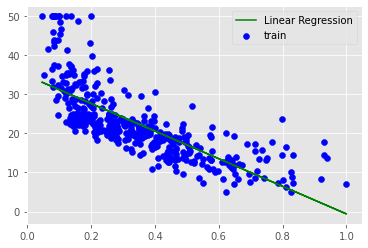

In [ ]:
plt.scatter(X_train_f, y_train, color="blue", label="train")
plt.plot(X_train_f, model.predict(X_train_bias), color="green", label="Linear Regression")
plt.legend()
plt.show()

In [ ]:
X_test_bias = np.stack((np.ones(X_test_f.shape[0]), X_test_f.reshape(-1,)), axis=1)  # add bias
X_test_bias

array([[1.        , 0.19331051],
       [1.        , 0.25098762],
       [1.        , 0.27653411],
       [1.        , 0.52067422],
       [1.        , 0.32499342],
       [1.        , 0.22307085],
       [1.        , 0.30155386],
       [1.        , 0.24466684],
       [1.        , 0.33289439],
       [1.        , 0.27995786],
       [1.        , 0.54306031],
       [1.        , 0.55886226],
       [1.        , 0.46852779],
       [1.        , 0.74479853],
       [1.        , 0.05056624],
       [1.        , 0.1248354 ],
       [1.        , 0.28285489],
       [1.        , 0.10745325],
       [1.        , 0.14037398],
       [1.        , 0.23097182],
       [1.        , 0.18962339],
       [1.        , 0.31682908],
       [1.        , 0.37108243],
       [1.        , 0.18936002],
       [1.        , 0.2688965 ],
       [1.        , 0.35106663],
       [1.        , 0.36423492],
       [1.        , 0.41585462],
       [1.        , 0.11087701],
       [1.        , 0.45009218],
       [1.

**3. Cálculo del error cuadrático medio**

In [ ]:
# 3. Predecir y evaluar acá.
y_train_pred = model.predict(X_train_bias)
y_test_pred = model.predict(X_test_bias)

In [ ]:
from sklearn.metrics import mean_squared_error

In [ ]:
train_error = mean_squared_error(y_train, y_train_pred)
test_error = mean_squared_error(y_test, y_test_pred)
print(f'Train error: {train_error:0.2}')
print(f'Test error: {test_error:0.2}')

Train error: 3.7e+01
Test error: 4.7e+01


**4. Gráfico del modelo resultante**

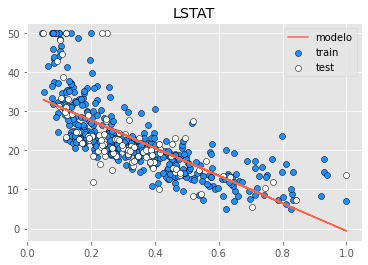

In [ ]:
# 4. Graficar acá. Ayuda:
x_start = min(np.min(X_train_f), np.min(X_test_f))
x_end = max(np.max(X_train_f), np.max(X_test_f))
x = np.linspace(x_start, x_end, 200).reshape(-1, 1)
plt.plot(X_test_f, model.predict(X_test_bias), color="tomato", label="modelo")
plt.scatter(X_train_f, y_train, facecolor="dodgerblue", edgecolor="k", label="train")
plt.scatter(X_test_f, y_test, facecolor="white", edgecolor="k", label="test")
plt.title(feature)
plt.legend()
plt.show()

## Ejercicio 4: Regresión Polinomial

En este ejercicio deben entrenar regresiones polinomiales de diferente complejidad, siempre usando **scikit-learn**.

Deben usar **el mismo atributo** seleccionado para el ejercicio anterior.

1. Para varios grados de polinomio, haga lo siguiente:
    1. Instancie y entrene una regresión polinomial.
    2. Prediga y calcule error en entrenamiento y evaluación. Imprima los valores.
    3. Guarde los errores en una lista.
2. Grafique las curvas de error en términos del grado del polinomio.
3. Interprete la curva, identificando el punto en que comienza a haber sobreajuste, si lo hay.
4. Seleccione el modelo que mejor funcione, y grafique el modelo conjuntamente con los puntos.
5. Interprete el resultado, haciendo algún comentario sobre las cualidades del modelo obtenido.

**Observación:** Con algunos atributos se pueden obtener errores en test menores a 40 e incluso a 35.

**1. Regresión polinomial para varios grados de polinomio**

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

degree = 1
pf = PolynomialFeatures(degree)
lr = LinearRegression(fit_intercept=False)  # el bias ya esta como feature
model = make_pipeline(pf, lr)

In [ ]:
model.fit(X_train_f, y_train)

Pipeline(steps=[('polynomialfeatures', PolynomialFeatures(degree=1)),
                ('linearregression', LinearRegression(fit_intercept=False))])

In [ ]:
lr.coef_

array([ 34.76519272, -35.3709119 ])

In [ ]:
y_train_pred = model.predict(X_train_f)
y_test_pred = model.predict(X_test_f)

In [ ]:
train_error = mean_squared_error(y_train, y_train_pred)
test_error = mean_squared_error(y_test, y_test_pred)
print(f'Train error: {train_error:0.2}')
print(f'Test error: {test_error:0.2}')

Train error: 3.7e+01
Test error: 4.7e+01


In [ ]:
train_errors = []
test_errors = []
degrees = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26]
for degree in degrees:
    # train:
    pf = PolynomialFeatures(degree)
    lr = LinearRegression(fit_intercept=False)
    model = make_pipeline(pf, lr)
    model.fit(X_train_f, y_train)
    
    # predict:
    y_train_pred = model.predict(X_train_f)
    y_test_pred = model.predict(X_test_f)
    
    # evaluate:
    train_error = mean_squared_error(y_train, y_train_pred)
    test_error = mean_squared_error(y_test, y_test_pred)
    print("Error entrenamiento grado: ",degree,train_error)
    print("Error de evaluación grado: ",degree,test_error)
    train_errors.append(train_error)
    test_errors.append(test_error)
    print("Numeros de features",len(lr.coef_))

Error entrenamiento grado:  0 85.1437202235075
Error de evaluación grado:  0 81.58231743908232
Numeros de features 1
Error entrenamiento grado:  1 36.523966406959666
Error de evaluación grado:  1 46.784242950225625
Numeros de features 2
Error entrenamiento grado:  2 28.18917233416823
Error de evaluación grado:  2 38.99977941078882
Numeros de features 3
Error entrenamiento grado:  3 26.784846496749747
Error de evaluación grado:  3 37.284828659193956
Numeros de features 4
Error entrenamiento grado:  4 25.84943285886594
Error de evaluación grado:  4 34.75909203576245
Numeros de features 5
Error entrenamiento grado:  5 25.034962537749568
Error de evaluación grado:  5 34.33181590484419
Numeros de features 6
Error entrenamiento grado:  6 25.014028004243414
Error de evaluación grado:  6 34.161816155073964
Numeros de features 7
Error entrenamiento grado:  7 25.0135349695989
Error de evaluación grado:  7 34.15350791313934
Numeros de features 8
Error entrenamiento grado:  8 24.84582297502997
Err

**2. Gráfico de curvas de error**

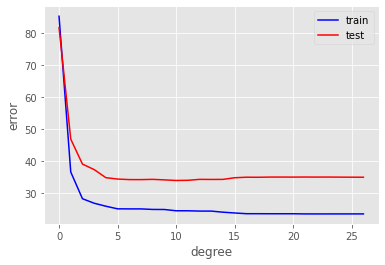

In [ ]:
plt.plot(degrees, train_errors, color="blue", label="train")
plt.plot(degrees, test_errors, color="red", label="test")
plt.legend()
plt.xlabel("degree")
plt.ylabel("error")
plt.show()

**4. Selección del modelo que mejor funcione**

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

degree = 3
pf = PolynomialFeatures(degree)
lr = LinearRegression(fit_intercept=False)  # el bias ya esta como feature
model = make_pipeline(pf, lr)
model.fit(X_train_f, y_train)

Pipeline(steps=[('polynomialfeatures', PolynomialFeatures(degree=3)),
                ('linearregression', LinearRegression(fit_intercept=False))])

In [ ]:
y_train_pred = model.predict(X_train_f)
y_test_pred = model.predict(X_test_f)

In [ ]:
y_test_pred.shape

(102,)

In [ ]:
lr.coef_

array([   69.53053534,  -490.66768105,  2116.67584456, -4648.71794204,
        4714.68867585, -1264.25199849, -1025.05954498,   536.94974698])

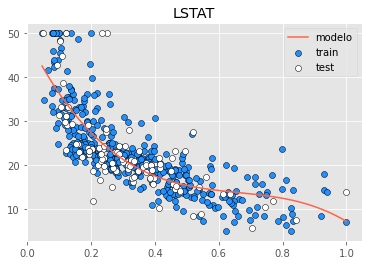

In [ ]:
x_start = min(np.min(X_train_f), np.min(X_test_f))
x_end = max(np.max(X_train_f), np.max(X_test_f))
x = np.linspace(x_start, x_end, 200).reshape(-1, 1)
plt.scatter(X_train_f, y_train, facecolor="dodgerblue", edgecolor="k", label="train")
plt.scatter(X_test_f, y_test, facecolor="white", edgecolor="k", label="test")
plt.plot(x, model.predict(x), color="tomato", label="modelo")
plt.title(feature)
plt.legend()
plt.show()

**5. Interpretación del resultado**

Pudimos observar graficando para varios grados del polinomio, que no hay mucha diferencia entre elegir el de grado 17 y el de grado 3, por lo cúal creemos que para simplificar el modelo, lo mejor era quedarnos con el de grado 3

## Ejercicio 5: Regresión con más de un Atributo

En este ejercicio deben entrenar regresiones que toman más de un atributo de entrada.

1. Seleccione **dos o tres atributos** entre los más relevantes encontrados en el ejercicio 2.
2. Repita el ejercicio anterior, pero usando los atributos seleccionados. No hace falta graficar el modelo final.
3. Interprete el resultado y compare con los ejercicios anteriores. ¿Se obtuvieron mejores modelos? ¿Porqué?

**1. Selección de atributos más relevantes**

Según lo encontrado en el ejercicio 2, seleccionamos los atributos RM: Promedio de habitaciones por vivienda y LSTAT: Proporción de gente de bajos recursos por población.

**2. Regresión polinomial con 2 atributos**

In [ ]:
selector = (boston['feature_names'] == 'LSTAT') | (boston['feature_names'] == 'RM')
X_train_fs = X_train[:, selector]
X_test_fs = X_test[:, selector]
X_train_fs.shape, X_test_fs.shape

((404, 2), (102, 2))

In [ ]:
transformer = MaxAbsScaler().fit(X_test_fs)
X_test_fs = transformer.transform(X_test_fs)
X_test_fs

array([[0.72584527, 0.19331051],
       [0.71243553, 0.25098762],
       [0.7304298 , 0.27653411],
       [0.6130659 , 0.52067422],
       [0.71426934, 0.32499342],
       [0.6686533 , 0.22307085],
       [0.67679083, 0.30155386],
       [0.68401146, 0.24466684],
       [0.56997135, 0.33289439],
       [0.73409742, 0.27995786],
       [0.68275072, 0.54306031],
       [0.76297994, 0.55886226],
       [0.72676218, 0.46852779],
       [0.53318052, 0.74479853],
       [0.89421203, 0.05056624],
       [0.8069914 , 0.1248354 ],
       [0.71541547, 0.28285489],
       [0.83518625, 0.10745325],
       [0.75025788, 0.14037398],
       [0.67048711, 0.23097182],
       [0.7365043 , 0.18962339],
       [0.6739255 , 0.31682908],
       [0.70223496, 0.37108243],
       [0.74292264, 0.18936002],
       [0.65123209, 0.2688965 ],
       [0.44275072, 0.35106663],
       [0.68366762, 0.36423492],
       [0.65432665, 0.41585462],
       [0.92481375, 0.11087701],
       [0.6982235 , 0.45009218],
       [0.

In [ ]:
transformer = MaxAbsScaler().fit(X_train_fs)
X_train_fs = transformer.transform(X_train_fs)
X_train_fs

array([[0.79168565, 0.26257436],
       [0.67892938, 0.26717144],
       [0.78553531, 0.30773391],
       [0.68473804, 0.33612764],
       [0.60410023, 0.7203894 ],
       [0.56526196, 0.37858302],
       [0.69703872, 0.24553813],
       [0.73974943, 0.23445105],
       [0.79077449, 0.12412115],
       [0.63974943, 0.71389941],
       [0.70296128, 0.51784749],
       [0.66879271, 0.41563007],
       [0.64134396, 0.80935641],
       [0.69066059, 0.3964305 ],
       [0.67596811, 0.91995673],
       [0.72574032, 0.30070308],
       [0.57357631, 0.69442942],
       [0.9023918 , 0.0854516 ],
       [0.76753986, 0.12682531],
       [0.62870159, 0.66414278],
       [0.638041  , 0.43807463],
       [0.68553531, 0.34937804],
       [0.68018223, 0.26960519],
       [0.66958998, 0.4753921 ],
       [0.84510251, 0.17495944],
       [0.63838269, 0.49918875],
       [0.67505695, 0.24932396],
       [0.82767654, 0.16360195],
       [0.73701595, 0.46295295],
       [0.77243736, 0.697404  ],
       [0.

In [ ]:
y_train

array([26.7, 21.7, 22. , 22.9, 10.4, 21.9, 20.6, 26.4, 41.3, 17.2, 27.1,
       20.4, 16.5, 24.4,  8.4, 23. ,  9.7, 50. , 30.5, 12.3, 19.4, 21.2,
       20.3, 18.8, 33.4, 18.5, 19.6, 33.2, 13.1,  7.5, 13.6, 17.4,  8.4,
       35.4, 24. , 13.4, 26.2,  7.2, 13.1, 24.5, 37.2, 25. , 24.1, 16.6,
       32.9, 36.2, 11. ,  7.2, 22.8, 28.7, 14.4, 24.4, 18.1, 22.5, 20.5,
       15.2, 17.4, 13.6,  8.7, 18.2, 35.4, 31.7, 33. , 22.2, 20.4, 23.9,
       25. , 12.7, 29.1, 12. , 17.7, 27. , 20.6, 10.2, 17.5, 19.7, 29.8,
       20.5, 14.9, 10.9, 19.5, 22.7, 19.5, 24.6, 25. , 24.5, 50. , 14.3,
       11.8, 31. , 28.7, 16.2, 43.5, 25. , 22. , 19.9, 22.1, 46. , 22.9,
       20.2, 43.1, 34.6, 13.8, 24.3, 21.5, 24.4, 21.2, 23.8, 26.6, 25.1,
        9.6, 19.4, 19.4,  9.5, 14. , 26.5, 13.8, 34.7, 16.3, 21.7, 17.5,
       15.6, 20.9, 21.7, 12.7, 18.5, 23.7, 19.3, 12.7, 21.6, 23.2, 29.6,
       21.2, 23.8, 17.1, 22. , 36.5, 18.8, 21.9, 23.1, 20.2, 17.4, 37. ,
       24.1, 36.2, 15.7, 32.2, 13.5, 17.9, 13.3, 11

In [ ]:
# 2. Resolver acá.
train_errors = []
test_errors = []
degrees = [ 1, 2, 3, 4, 5, 6, 7, 8, 9,10]
for degree in degrees:
    # train:
    pf = PolynomialFeatures(degree)
    lr = LinearRegression(fit_intercept=False)
    model = make_pipeline(pf, lr)
    model.fit(X_train_fs, y_train)
    
    # predict:
    y_train_pred = model.predict(X_train_fs)
    y_test_pred = model.predict(X_test_fs)
    
    # evaluate:
    train_error = mean_squared_error(y_train, y_train_pred)
    test_error = mean_squared_error(y_test, y_test_pred)
    print("Error entrenamiento grado: ",degree,train_error)
    print("Error de evaluación grado: ",degree,test_error)
    train_errors.append(train_error)
    test_errors.append(test_error)
    print("Numeros de features",len(lr.coef_))

Error entrenamiento grado:  1 28.79027648205344
Error de evaluación grado:  1 37.570398026588734
Numeros de features 3
Error entrenamiento grado:  2 18.659453833139377
Error de evaluación grado:  2 28.350426171403786
Numeros de features 6
Error entrenamiento grado:  3 17.07775402237082
Error de evaluación grado:  3 28.868052431596883
Numeros de features 10
Error entrenamiento grado:  4 14.188503706315291
Error de evaluación grado:  4 33.68792266802181
Numeros de features 15
Error entrenamiento grado:  5 12.905613730164282
Error de evaluación grado:  5 35.01817447684692
Numeros de features 21
Error entrenamiento grado:  6 12.35215460725411
Error de evaluación grado:  6 35.13860856224754
Numeros de features 28
Error entrenamiento grado:  7 12.120405616492532
Error de evaluación grado:  7 44.681536779346764
Numeros de features 36
Error entrenamiento grado:  8 11.747882486128187
Error de evaluación grado:  8 1707.7584818549312
Numeros de features 45
Error entrenamiento grado:  9 11.0312683

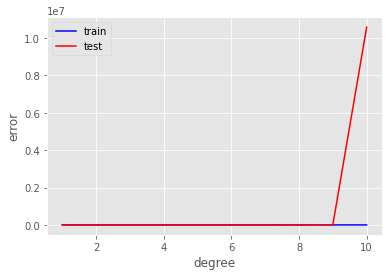

In [ ]:
plt.plot(degrees, train_errors, color="blue", label="train")
plt.plot(degrees, test_errors, color="red", label="test")
plt.legend()
plt.xlabel("degree")
plt.ylabel("error")
plt.show()

## Más ejercicios (opcionales)

### Ejercicio 6: A Todo Feature

Entrene y evalúe regresiones pero utilizando todos los atributos de entrada (va a andar mucho más lento). Estudie los resultados.

### Ejercicio 7: Regularización

Entrene y evalúe regresiones con regularización "ridge". Deberá probar distintos valores de "alpha" (fuerza de la regularización). ¿Mejoran los resultados?
